In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import poisson


In [4]:
df = pd.read_csv("data/Car_sale_ads.csv")
list(df.columns)
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.0,...,Manual,coupe,2.0,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.0,...,Automatic,small_cars,3.0,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.0,...,Manual,small_cars,3.0,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.0,...,Manual,small_cars,3.0,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [6]:
price = df["Price"].copy()
currency = df["Currency"].copy()

for idx, (p, c) in enumerate(zip(price, currency)):
    if c == "EUR":
        price_PLN = p * 4.6
        price[idx] = price_PLN
        currency[idx] = "PLN"


df["Currency"] = currency
df["Price"] = price


cols2add = ["Price", "Condition", "Vehicle_brand", "Vehicle_model", "Vehicle_version","Vehicle_generation", "Production_year", "Mileage_km", "Power_HP", "Displacement_cm3", "Fuel_type"]
test_df = df[cols2add]

In [7]:
test_df.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type
0,86200.0,New,Abarth,595,NaN,NaN,2021,1.0,145.0,1400.0,Gasoline
1,43500.0,Used,Abarth,Other,NaN,NaN,1974,59000.0,75.0,1100.0,Gasoline
2,44900.0,Used,Abarth,500,NaN,NaN,2018,52000.0,180.0,1368.0,Gasoline
3,39900.0,Used,Abarth,500,NaN,NaN,2012,29000.0,160.0,1368.0,Gasoline
4,97900.0,New,Abarth,595,NaN,NaN,2021,600.0,165.0,1368.0,Gasoline


In [8]:
audi_cars = test_df[test_df['Vehicle_brand'] == "Audi"]
audi_a3_cars = audi_cars[audi_cars["Vehicle_model"] == 'A3']
audi_a3_2010 = audi_a3_cars[audi_a3_cars["Production_year"] == 2010]
audi_a3_2000ccm = audi_a3_cars[audi_a3_cars["Displacement_cm3"] >= 1950]
audi_a3_2000ccm = audi_a3_2000ccm[audi_a3_2000ccm["Displacement_cm3"] <= 2050]
audi_a3_2000ccm = audi_a3_2000ccm.dropna()

In [9]:
import matplotlib.pyplot as plt
def price_plot(df, column_name):
    price = df["Price"]
    data = df[column_name]
    plt.plot(data,price, 'o')
    plt.xlabel(column_name)
    plt.ylabel("Price_PLN")
    # z = np.polyfit(data, price, 1)
    # p = np.poly1d(z)
    # print(p)
    # plt.plot(data, p(data))

def plot_mean(df, column_name, round_it=False):
    if round_it:
        df = df.round(-1)
    mean_values = df.groupby(column_name)['Price'].mean()

    # Plotting the mean values
    mean_values.plot()

    # Adding labels and title to the plot
    plt.xlabel(column_name)
    plt.ylabel('Price_PLN')
    plt.title("Mean price of car by category")

#price_plot(audi_a3_cars, "Mileage_km")

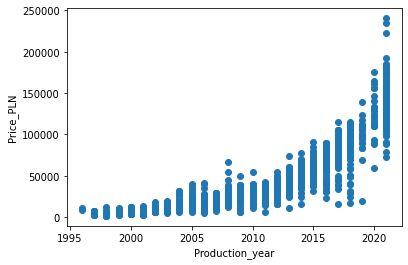

In [10]:
price_plot(audi_a3_cars,"Production_year")

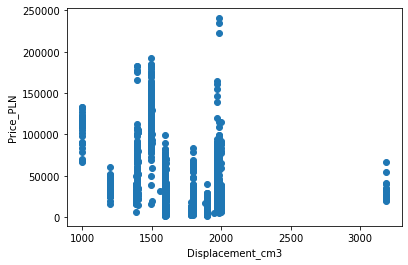

In [23]:
price_plot(audi_a3_cars, "Displacement_cm3")

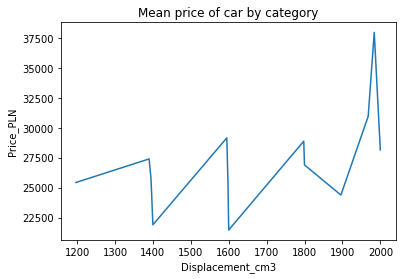

In [24]:
plot_mean(audi_a3_2010, "Displacement_cm3")

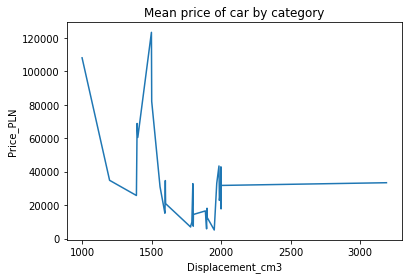

In [25]:
plot_mean(audi_a3_cars, "Displacement_cm3")

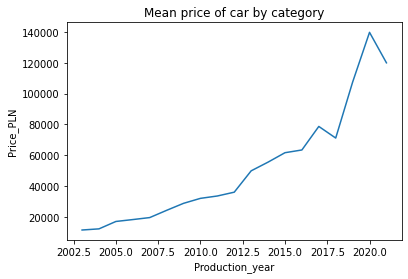

In [26]:
plot_mean(audi_a3_2000ccm, "Production_year")

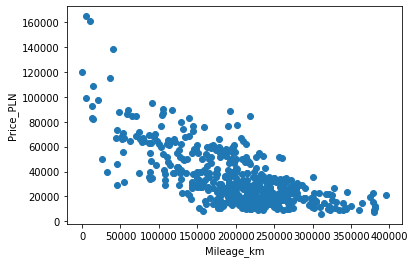

In [27]:
price_plot(audi_a3_2000ccm, "Mileage_km")


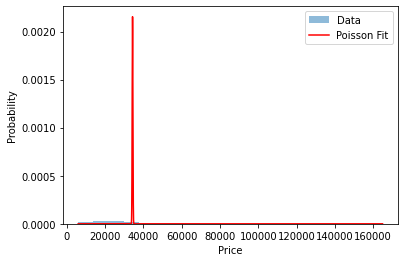

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import poisson

# Get the data from the histogram
data = audi_a3_2000ccm['Price'].values

# Compute the histogram
hist, bins = np.histogram(data, bins=20, density=True)

# Calculate the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Define the Poisson distribution function
def poisson_distribution(x, lambda_):
    return poisson.pmf(x, lambda_)

# Fit the Poisson distribution
popt, _ = curve_fit(poisson_distribution, bin_centers, hist, p0=[np.mean(data)])

# Generate the fitted curve
x_values = np.arange(min(data), max(data)+1)
y_values = poisson_distribution(x_values, *popt)

# Plot the histogram and fitted curve
plt.figure()
plt.hist(data, bins=20, density=True, alpha=0.5, label='Data')
plt.plot(x_values, y_values, 'r-', label='Poisson Fit')

# Display the plot
plt.xlabel('Price')
plt.ylabel('Probability')
plt.legend()
plt.show()



In [37]:
import pandas as pd
import cmdstanpy


model = cmdstanpy.CmdStanModel(stan_file='test.stan')

INFO:cmdstanpy:compiling stan file /home/DA/project/test.stan to exe file /home/DA/project/test
INFO:cmdstanpy:compiled model executable: /home/DA/project/test


In [38]:
R = 1000
sim=model.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=4,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |███▎      | 00:00 Status

chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [39]:
sim_pd = sim.draws_pd()
sim_pd.head()

,lp__,accept_stat__,mi,sigma,prize_sim
0,0.0,0.0,62081.7,200.116,62069.0
1,0.0,0.0,22277.3,197.602,22112.5
2,0.0,0.0,58984.2,201.685,58911.1
3,0.0,0.0,42434.9,201.320,42642.4
4,0.0,0.0,25982.0,202.496,25977.5


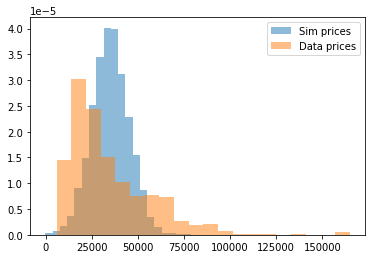

In [40]:
plt.figure()
plt.hist(sim_pd['prize_sim'].values, bins = 20, alpha = 0.5, density = True, label = 'Sim prices')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.show()

In [26]:
import pandas as pd
import cmdstanpy


model = cmdstanpy.CmdStanModel(stan_file='car_price_1_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [ ]:
R = 1000
sim=model.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=4,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: variable does not exist; processing stage=data initialization; variable name=N; base type=int (in '/home/DA/project/car_price_1_ppc.stan', line 2, column 4 to column 19)
Exception: variable does not exist; processing stage=data initialization; variable name=N; base type=int (in '/home/DA/project/car_price_1_ppc.stan', line 2, column 4 to column 19)
Exception: variable does not exist; processing stage=data initialization; variable name=N; base type=int (in '/home/DA/project/car_price_1_ppc.stan', line 2, column 4 to column 19)
Exception: variable does not exist; processing stage=data initialization; variable name=N; base type=int (in '/home/DA/project/car_price_1_ppc.stan', line 2, column 4 to column 19)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/DA/project/car_price_1_ppc', 'id=1', 'random', 'seed=29042020', 'output', 'file=/tmp/tmpvgi6ygtb/car_price_1_ppc-20230630181115_1.csv', 'refresh=1000', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpvgi6ygtb/car_price_1_ppc-20230630181115_1.csv
 console_msgs (if any):
	/tmp/tmpvgi6ygtb/car_price_1_ppc-20230630181115_0-stdout.txt

In [ ]:
data = {
    'N': len(audi_a3_2000ccm),
    'x1': audi_a3_2000ccm['Mileage_km'].values,
    'x2': audi_a3_2000ccm['Production_year'].values,
    'y': audi_a3_2000ccm['Price'].values
}

model_fit = cmdstanpy.CmdStanModel(stan_file='car_price_1_fit.stan')
fit = model_fit.sample(data=data, chains=4, iter_warmup=1000, iter_sampling=2000)


10:22:58 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▎         | 00:00 Status


chain 1 |▋         | 00:00 Iteration:    1 / 3000 [  0%]  (Warmup)

chain 1 |▉         | 00:00 Iteration:  100 / 3000 [  3%]  (Warmup)


chain 1 |█▎        | 00:03 Iteration:  200 / 3000 [  6%]  (Warmup)


chain 1 |█▌        | 00:05 Iteration:  300 / 3000 [ 10%]  (Warmup)




chain 1 |█▉        | 00:07 Iteration:  400 / 3000 [ 13%]  (Warmup)
chain 1 |██▏       | 00:07 Iteration:  500 / 3000 [ 16%]  (Warmup)


chain 1 |██▊       | 00:08 Iteration:  700 / 3000 [ 23%]  (Warmup)
chain 1 |███▏      | 00:08 Iteration:  800 / 3000 [ 26%]  (Warmup)
chain 1 |████      | 00:08 Iteration: 1001 / 3000 [ 33%]  (Sampling)

chain 1 |████▍     | 00:09 Iteration: 1100 / 3000 [ 36%]  (Sampling)
chain 1 |████▋     | 00:10 Iteration: 1200 / 3000 [ 40%]  (Sampling)
chain 1 |█████▎    | 00:11 Iteration: 1400 / 3000 [ 46%]  (Sampling)


chain 1 |█████▋    | 00:11 Iteration: 1500 / 30


10:23:38 - cmdstanpy - INFO - CmdStan done processing.


10:23:38 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 238 iterations at max treedepth (11.9%)
	Chain 4 had 23 iterations at max treedepth (1.1%)
	Use function "diagnose()" to see further information.


In [ ]:
fit_pd = fit.draws_pd()
fit_pd

In [ ]:
prices = fit_pd.loc[:, 'y_generated[1]':'y_generated[532]'].values

In [ ]:
plt.figure()
for i in range(1, 100, 10):
    plt.hist(prices[i], bins = 20, alpha = 0.5, density = True, label = f'Simulated prices {i}')
plt.hist(audi_a3_2000ccm['Price'].values, bins = 20, alpha = 0.5, density = True, label = 'Data prices')
plt.legend()
plt.title('Comparision of data and simulated prices')
plt.show()